## ESG Scoring system

In [1]:
import pandas as pd
import numpy as np

# Assuming the data is saved in a file named "company_data.csv"
df = pd.read_csv("./data/company_data.csv")

# Set the weight for each ESG category
weights = {
    'E': 0.5,  # Environmental (E) contributes 50%
    'S': 0.3,  # Social (S) contributes 30%
    'G': 0.2   # Governance (G) contributes 20%
}

# Define the metrics for environmental, social, and governance
environmental_metrics = ['Greenhouse Gas Emissions(“GHG”)', 'Energy Consumption(GJ)', 'Water Consumption', 'Waste Generation']
social_metrics = ['Development & Training', 'Occupational Health & Safety']
governance_metrics = ['Assurance of Sustainability Report']

# Classification function
def classify_metrics(label):
    if label in environmental_metrics:
        return 'E'
    elif label in social_metrics:
        return 'S'
    elif label in governance_metrics:
        return 'G'
    else:
        return 'Unknown'

# Classify each Predicted_label
df['Category'] = df['Predicted_label'].apply(classify_metrics)

# Calculate the average score for each category
category_scores = df.groupby('Category')['Score'].mean().reset_index()

# Calculate the weighted score
def calculate_scores(category_scores, weights):
    category_score = {'E': 0, 'S': 0, 'G': 0}
    
    # Get the average score for each category
    for category in ['E', 'S', 'G']:
        category_score[category] = category_scores[category_scores['Category'] == category]['Score'].mean() if not category_scores[category_scores['Category'] == category].empty else 0
    
    # Calculate the weighted total score
    weighted_score = (
        category_score['E'] * weights['E'] + 
        category_score['S'] * weights['S'] + 
        category_score['G'] * weights['G']
    )
    
    return category_score, weighted_score

# Calculate the scores
category_score, total_score = calculate_scores(category_scores, weights)

# Standardize scores to range 0-100
def standardize_score(score, score_range):
    return (score - score_range[0]) / (score_range[1] - score_range[0]) * 100

# Set score range
score_range = {
    'E': (0, 10),
    'S': (0, 10),
    'G': (0, 10)
}

# Standardize the scores
standardized_scores = {
    category: standardize_score(category_score[category], score_range[category])
    for category in category_score
}

# Standardize the total score
total_standardized_score = standardize_score(total_score, (0, 10))

# Score classification
def categorize_score(score):
    if score < 50:
        return 'Poor'
    elif score > 70:
        return 'Good'
    else:
        return 'Average'

# Output the results
category_labels = [f'{category} Score' for category in ['E', 'S', 'G']]
print(f"Company's ESG Scores:")
for category, score in standardized_scores.items():
    print(f"  {category_labels.pop(0)}: {score:.2f}")
    
print(f"  Total Score: {total_standardized_score:.2f}")
print(f"  Total Score Classification: {categorize_score(total_standardized_score)}")

environmental_score = standardized_scores['E']
social_score = standardized_scores['S']
governance_score = standardized_scores['G']


Company's ESG Scores:
  E Score: 60.41
  S Score: 81.00
  G Score: 70.00
  Total Score: 68.51
  Total Score Classification: Average


### 1. **Identify Key ESG Metrics for Renewable Energy Sector**
   The renewable energy sector has unique characteristics that should be reflected in its ESG performance indicators. These can include:
   - **Environmental (E):**
     - **Carbon footprint reduction**: Measures how well the company is reducing its greenhouse gas (GHG) emissions.
     - **Energy consumption efficiency**: Efficiency in energy use, particularly renewable energy sourced.
     - **Waste generation**: Amount of waste produced by the operations, especially in solar panels or wind turbines' end-of-life management.
     - **Water consumption**: The amount of water used in the process of energy generation or cooling.
   - **Social (S):**
     - **Community engagement**: The extent to which the company engages with and benefits the local communities, including job creation.
     - **Labor practices**: Employee welfare, health and safety standards, especially for field workers in energy plants.
     - **Health & Safety**: How the company manages safety for employees and the surrounding community.
   - **Governance (G):**
     - **Board diversity**: The diversity of the board of directors, which is often used as an indicator of good governance.
     - **Transparency in reporting**: Transparency in disclosing ESG practices and performance, including GHG emissions and energy efficiency.
     - **Ethical practices**: The company's practices regarding anti-corruption and business ethics.

### 2. **Collect Industry Data**
   Collect data from publicly available sources, such as:
   - **Sustainability reports of renewable energy companies**: Review reports from companies like Tesla, NextEra Energy, Ørsted, etc., which provide insights into their ESG performance.
   - **ESG rating agencies**: Use benchmarks provided by agencies like MSCI, Sustainalytics, and CDP (Carbon Disclosure Project).
   - **Industry reports and publications**: Obtain reports from organizations like the International Renewable Energy Agency (IRENA), Global Wind Energy Council (GWEC), or Renewable Energy Policy Network for the 21st Century (REN21).
   - **Peer comparisons**: Compare the ESG performance of companies within the renewable energy sector to derive common benchmarks.

### 3. **Develop ESG Performance Benchmarks**
   Once you have the data, create industry-specific benchmarks for each ESG component by calculating the average performance or defining a range of performance for key metrics. Here's an example of how you could structure the benchmarks:

#### **Environmental (E) Benchmarks:**
   - **GHG Emissions**: Aim for a reduction in GHG emissions by X% annually. Companies with a decrease in emissions by over 10% annually can be considered top performers.
   - **Energy Consumption**: A renewable energy company should source at least 60% of its energy from renewable sources. Top performers could be companies sourcing 90% or more from renewable energy.
   - **Waste Generation**: Companies should minimize waste production. A benchmark for good performance could be a reduction in operational waste by 20% annually.
   - **Water Consumption**: A benchmark of less than 1,000 m³ of water per unit of energy produced can be a good reference.

#### **Social (S) Benchmarks:**
   - **Community Engagement**: A renewable energy company should have at least 5 community development initiatives per year. Top performers can have more than 10.
   - **Labor Practices**: Companies should have 100% compliance with international labor standards. Top performers can also engage in further initiatives, such as diversity programs or worker training.
   - **Health & Safety**: A company with an incident rate of less than 1 injury per 1,000 employees is performing well. Top performers could be those with zero accidents or fatalities.

#### **Governance (G) Benchmarks:**
   - **Board Diversity**: A benchmark for good governance is having at least 30% female representation on the board. Top performers should have gender parity on their boards.
   - **Transparency in Reporting**: Companies should publish annual sustainability reports that adhere to global standards like GRI (Global Reporting Initiative) or SASB (Sustainability Accounting Standards Board). Top performers might also integrate third-party auditing and ratings into their reports.
   - **Ethical Practices**: A company must have clear anti-corruption policies, with zero violations or penalties. Top performers may also have industry-leading ethics policies and public commitments to sustainability.

### 4. **Set Score Ranges**
   Establish a scoring range for each of the key metrics:
   - **Score Range**: Set a range from 0 to 100, where:
     - 0-40: Below industry average (poor performance)
     - 41-70: Industry average (adequate performance)
     - 71-100: Above industry average (strong performance)
   - **Example**: 
     - For GHG emissions, a reduction of 10% could score 50 points, 20% could score 70 points, and 30% or more could score 90 points.

### 5. **Monitor and Update**
   Since the renewable energy sector is dynamic and evolving, it’s important to regularly monitor these benchmarks and update them as new data and best practices emerge. You can:
   - **Review annual industry reports** to adjust benchmarks.
   - **Engage with stakeholders** in the industry to align the benchmarks with current trends.
   - **Adapt to technological advancements** that could impact ESG performance, such as improvements in renewable energy generation or carbon capture technologies.

### Renewable Energy Sector ESG Benchmark Table:

| **ESG Category**            | **Metric**                                 | **Industry Benchmark** | **Top Performer**     | **Score Range**  |
|-----------------------------|--------------------------------------------|-------------------------|-----------------------|------------------|
| **Environmental (E)**        | GHG Emissions Reduction                    | -10% annually           | -30% annually         | 0-100            |
|                             | Energy Sourcing from Renewables            | 60% renewable           | 90% renewable         | 0-100            |
|                             | Waste Reduction                            | 10% annually            | 20% annually          | 0-100            |
| **Social (S)**               | Community Engagement                       | 5 initiatives/year      | 10+ initiatives/year  | 0-100            |
|                             | Health & Safety (Incident Rate)            | <1 per 1,000 employees  | 0 incidents           | 0-100            |
| **Governance (G)**           | Board Diversity                            | 30% female representation| Gender parity (50%)   | 0-100            |
|                             | Reporting Transparency (GRI/SASB)          | Yes, with external audits | Full integration of third-party audits | 0-100            |

### Conclusion:
By setting up benchmarks in this way, you can effectively measure and compare ESG performance in the renewable energy sector. These benchmarks will help companies understand where they stand in terms of ESG performance and where they need to improve to be industry leaders.

visulaization

In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import dash
from dash import dcc, html

# 假设数据文件名为 "company_data.csv"
df = pd.read_csv("./data/company_data.csv")

# 设置ESG权重
weights = {'E': 0.5, 'S': 0.3, 'G': 0.2}

# 定义指标分类
environmental_metrics = ['Greenhouse Gas Emissions(“GHG”)', 'Energy Consumption(GJ)', 'Water Consumption', 'Waste Generation']
social_metrics = ['Development & Training', 'Occupational Health & Safety']
governance_metrics = ['Assurance of Sustainability Report']

# 分类函数
def classify_metrics(label):
    if label in environmental_metrics:
        return 'E'
    elif label in social_metrics:
        return 'S'
    elif label in governance_metrics:
        return 'G'
    else:
        return 'Unknown'

# 对每个指标进行分类
df['Category'] = df['Predicted_label'].apply(classify_metrics)

# 按类别计算各指标均值
category_avg_scores = df.groupby(['Category', 'Predicted_label'])['Score'].mean().reset_index()

# 创建柱状图展示各指标的均值
bar_chart = go.Figure([
    go.Bar(
        x=category_avg_scores['Predicted_label'], 
        y=category_avg_scores['Score'],
        name="ESG Scores",
        marker=dict(color=category_avg_scores['Score'], colorscale='Viridis')
    )
])

# 计算每个类别的得分均值
category_scores = df.groupby('Category')['Score'].mean().to_dict()
E_score, S_score, G_score = category_scores.get('E', 0), category_scores.get('S', 0), category_scores.get('G', 0)

# 计算加权总得分
total_score = E_score * weights['E'] + S_score * weights['S'] + G_score * weights['G']

# 标准化函数
def standardize_score(score, score_range):
    return (score - score_range[0]) / (score_range[1] - score_range[0]) * 100

# 设置得分范围
score_range = {'E': (0, 10), 'S': (0, 10), 'G': (0, 10)}

# 标准化得分
standardized_scores = {
    'E': standardize_score(E_score, score_range['E']),
    'S': standardize_score(S_score, score_range['S']),
    'G': standardize_score(G_score, score_range['G']),
}
total_standardized_score = standardize_score(total_score, (0, 10))

# 仪表图
gauge_e = go.Figure(go.Indicator(
    mode="gauge+number", value=standardized_scores['E'],
    title={'text': "Environmental (E) Score"},
    gauge={'axis': {'range': [None, 100]},
           'steps': [{'range': [0, 40], 'color': "red"},
                     {'range': [40, 70], 'color': "yellow"},
                     {'range': [70, 100], 'color': "green"}]
           }
))

gauge_s = go.Figure(go.Indicator(
    mode="gauge+number", value=standardized_scores['S'],
    title={'text': "Social (S) Score"},
    gauge={'axis': {'range': [None, 100]},
           'steps': [{'range': [0, 40], 'color': "red"},
                     {'range': [40, 70], 'color': "yellow"},
                     {'range': [70, 100], 'color': "green"}]
           }
))

gauge_g = go.Figure(go.Indicator(
    mode="gauge+number", value=standardized_scores['G'],
    title={'text': "Governance (G) Score"},
    gauge={'axis': {'range': [None, 100]},
           'steps': [{'range': [0, 40], 'color': "red"},
                     {'range': [40, 70], 'color': "yellow"},
                     {'range': [70, 100], 'color': "green"}]
           }
))

gauge_total = go.Figure(go.Indicator(
    mode="gauge+number", value=total_standardized_score,
    title={'text': "Total ESG Score"},
    gauge={'axis': {'range': [None, 100]},
           'steps': [{'range': [0, 40], 'color': "red"},
                     {'range': [40, 70], 'color': "yellow"},
                     {'range': [70, 100], 'color': "green"}]
           }
))

# Dash应用布局
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Company ESG Performance Dashboard"),
    html.P("This dashboard shows the ESG performance of Company XYZ based on recent scoring."),

    # ESG Bar Chart
    dcc.Graph(id='esg-bar-chart', figure=bar_chart),

    html.H2("ESG Score Visualization"),
    html.Div([
        dcc.Graph(id='gauge-e', figure=gauge_e, style={'display': 'inline-block', 'width': '45%'}),
        dcc.Graph(id='gauge-s', figure=gauge_s, style={'display': 'inline-block', 'width': '45%'})
    ]),
    html.Div([
        dcc.Graph(id='gauge-g', figure=gauge_g, style={'display': 'inline-block', 'width': '45%'}),
        dcc.Graph(id='gauge-total', figure=gauge_total, style={'display': 'inline-block', 'width': '45%'})
    ]),

    html.H2("Key Insights"),
    html.P("This dashboard provides an overview of the ESG performance across various categories, along with an overall ESG score.")
])

# 运行应用
if __name__ == '__main__':
    app.run_server(debug=True)

import dash
from dash import dcc, html
import plotly.graph_objects as go

# Your figures
gauge_e = go.Figure(go.Indicator(
    mode="gauge+number", value=standardized_scores['E'],
    title={'text': "Environmental (E) Score"},
    gauge={'axis': {'range': [None, 100]},
           'steps': [{'range': [0, 40], 'color': "red"},
                     {'range': [40, 70], 'color': "yellow"},
                     {'range': [70, 100], 'color': "green"}]
           }
))

gauge_s = go.Figure(go.Indicator(
    mode="gauge+number", value=standardized_scores['S'],
    title={'text': "Social (S) Score"},
    gauge={'axis': {'range': [None, 100]},
           'steps': [{'range': [0, 40], 'color': "red"},
                     {'range': [40, 70], 'color': "yellow"},
                     {'range': [70, 100], 'color': "green"}]
           }
))

gauge_g = go.Figure(go.Indicator(
    mode="gauge+number", value=standardized_scores['G'],
    title={'text': "Governance (G) Score"},
    gauge={'axis': {'range': [None, 100]},
           'steps': [{'range': [0, 40], 'color': "red"},
                     {'range': [40, 70], 'color': "yellow"},
                     {'range': [70, 100], 'color': "green"}]
           }
))

gauge_total = go.Figure(go.Indicator(
    mode="gauge+number", value=total_standardized_score,
    title={'text': "Total ESG Score"},
    gauge={'axis': {'range': [None, 100]},
           'steps': [{'range': [0, 40], 'color': "red"},
                     {'range': [40, 70], 'color': "yellow"},
                     {'range': [70, 100], 'color': "green"}]
           }
))

# Dash app setup
app = dash.Dash(__name__)

import plotly.graph_objects as go

# Assuming `gauge_e`, `gauge_s`, `gauge_g`, and `gauge_total` are your Plotly figures
gauge_e.write_html('gauge_e.html')
gauge_s.write_html('gauge_s.html')
gauge_g.write_html('gauge_g.html')
gauge_total.write_html('gauge_total.html')
bar_chart.write_html("bar_chart.html")
# Now you can manually create an HTML template or use an HTML file to link these files
html_template = """
<html>
<head>
    <title>Company ESG Performance Dashboard</title>
</head>
<body>
    <h1>Company ESG Performance Dashboard</h1>
    <p>This dashboard shows the ESG performance of Company XYZ based on recent scoring.</p>

    <h2>ESG Score Visualization</h2>
    <div>
        <!-- First row with two gauges -->
        <div style="display: flex; justify-content: space-between;">
            <div>
                <h3>Environmental (E) Score</h3>
                <iframe src="gauge_e.html" width="500" height="400"></iframe>
            </div>
            <div>
                <h3>Social (S) Score</h3>
                <iframe src="gauge_s.html" width="500" height="400"></iframe>
            </div>
        </div>

        <!-- Second row with two gauges -->
        <div style="display: flex; justify-content: space-between; margin-top: 20px;">
            <div>
                <h3>Governance (G) Score</h3>
                <iframe src="gauge_g.html" width="500" height="400"></iframe>
            </div>
            <div>
                <h3>Total ESG Score</h3>
                <iframe src="gauge_total.html" width="500" height="400"></iframe>
            </div>
        </div>
    </div>

    <!-- Adding the bar chart here -->
    <h2>ESG Score Distribution</h2>
    <div>
        <h3>ESG Scores by Category</h3>
        <iframe src="bar_chart.html" width="800" height="600"></iframe>
    </div>

    <h2>Key Insights</h2>
    <p>This dashboard provides an overview of the ESG performance across various categories, along with an overall ESG score.</p>
</body>
</html>
"""


with open('esg_dashboard_report.html', 'w') as f:
    f.write(html_template)





put in template to creat html

{'company_name': 'Sample Company', 'upload_date': '2024-11-13', 'analysis_date': '2024-11-13', 'background': {'introduction': 'focused on sustainable innovation in its industry...'}, 'highlights': {'strategy': "Company's multi-year strategy for sustainable growth...", 'goals': [{'indicator': 'Energy Efficiency', 'value': 85, 'industry_avg': 78, 'summary': 'Above industry average.'}]}, 'scores': {'environmental': 60.41095890410959, 'social': 81.0, 'governance': 70.0, 'industry_position_env': 80, 'industry_position_soc': 75, 'industry_position_gov': 70, 'environmental_summary': 'Good progress in environmental practices.', 'social_summary': 'Strong social initiatives.', 'governance_summary': 'Governance requires improvement.'}, 'achievements_outlook': "Company's efforts align with upcoming regulatory trends...", 'highest_rated_dimension': 'Environmental', 'lowest_rated_dimension': 'Governance', 'contact_info': 'contact@sustainex.com', 'industry_position_env': 'Median', 'environmental_summ

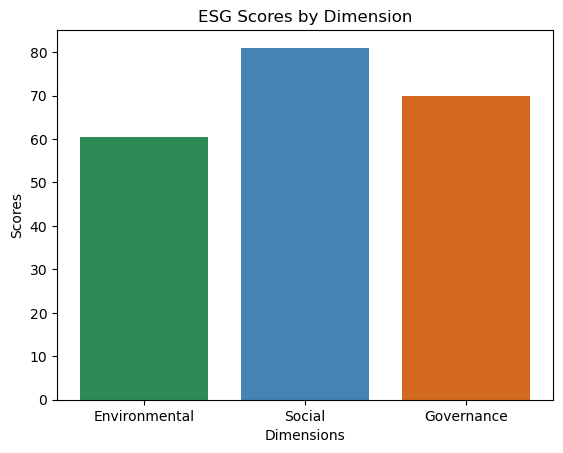

In [4]:
from jinja2 import Environment, FileSystemLoader
from datetime import date
import matplotlib.pyplot as plt
import base64
import io
data = {
    "company_name": "Sample Company",
    "upload_date": date.today().strftime("%Y-%m-%d"),
    "analysis_date": date.today().strftime("%Y-%m-%d"),
    "background": {
        "introduction": "focused on sustainable innovation in its industry..."
    },
    "highlights": {
        "strategy": "Company's multi-year strategy for sustainable growth...",
        "goals": [
            {"indicator": "Energy Efficiency", "value": 85, "industry_avg": 78, "summary": "Above industry average."},
            # Add more indicators as needed
        ]
    },
    "scores": {
        "environmental": environmental_score,  # Replace with actual scores
        "social": social_score,         # Replace with actual scores
        "governance": governance_score,     # Replace with actual scores
        "industry_position_env": 80,  # Replace with actual scores
        "industry_position_soc": 75,  # Replace with actual scores
        "industry_position_gov": 70,  # Replace with actual scores
        "environmental_summary": "Good progress in environmental practices.",
        "social_summary": "Strong social initiatives.",
        "governance_summary": "Governance requires improvement."
    },
    "achievements_outlook": "Company's efforts align with upcoming regulatory trends...",
    "highest_rated_dimension": "Environmental",
    "lowest_rated_dimension": "Governance",
    "contact_info": "contact@sustainex.com"
}

# Define thresholds and summaries based on scores
def update_industry_position_and_summary(data):
    # Environmental position and summary
    if data["scores"]["environmental"] > 70:
        data["industry_position_env"] = "Top 10%"
        data["environmental_summary"] = "Strong in emissions reduction."
    elif 40 < data["scores"]["environmental"] <= 70:
        data["industry_position_env"] = "Median"
        data["environmental_summary"] = "Average in emissions reduction."
    else:
        data["industry_position_env"] = "Below Median"
        data["environmental_summary"] = "Needs improvement in emissions reduction."
    
    # Social position and summary
    if data["scores"]["social"] > 70:
        data["industry_position_soc"] = "Top 10%"
        data["social_summary"] = "Strong in labor standards."
    elif 40 < data["scores"]["social"] <= 70:
        data["industry_position_soc"] = "Median"
        data["social_summary"] = "Average on labor standards."
    else:
        data["industry_position_soc"] = "Below Median"
        data["social_summary"] = "Needs improvement in labor standards."
    
    # Governance position and summary
    if data["scores"]["governance"] > 70:
        data["industry_position_gov"] = "Top 10%"
        data["governance_summary"] = "Strong in transparency."
    elif 40 < data["scores"]["governance"] <= 70:
        data["industry_position_gov"] = "Median"
        data["governance_summary"] = "Average on transparency."
    else:
        data["industry_position_gov"] = "Below Median"
        data["governance_summary"] = "Needs improvement in transparency."

# Call the function to update the data dictionary
update_industry_position_and_summary(data)

# Print the updated data dictionary to verify the updates
print(data)

data.update({
    "company_name": "Sample Company",
    "upload_date": date.today().strftime("%Y-%m-%d"),
    "analysis_date": date.today().strftime("%Y-%m-%d"),
    "background": {
        "introduction": "focused on sustainable innovation in its industry...",
    },
    "highlights": {
        "strategy": "Company's multi-year strategy for sustainable growth...",
        "goals": [
            {"indicator": "Energy Efficiency", "value": 85, "industry_avg": 78, "summary": "Above industry average."},
            # Additional indicators here
        ]
    },
    "scores": {
        "environmental": data["scores"]["environmental"],
        "social": data["scores"]["social"],
        "governance": data["scores"]["governance"],
        "industry_position_env": data["industry_position_env"],
        "industry_position_soc": data["industry_position_soc"],
        "industry_position_gov": data["industry_position_gov"],
        "environmental_summary": data["environmental_summary"],
        "social_summary": data["social_summary"],
        "governance_summary": data["governance_summary"]
    },
    "achievements_outlook": "Company's efforts align with upcoming regulatory trends...",
    "highest_rated_dimension": "Environmental",
    "lowest_rated_dimension": "Governance",
    "contact_info": "contact@sustainex.com"
}  
)     
# Define data variables, including calculated scores and visualizations
# Extend data with additional fields after updating

# Example of creating a sample bar plot and converting it to base64
def create_bar_chart():
    fig, ax = plt.subplots()
    categories = ["Environmental", "Social", "Governance"]
    values = [data["scores"]["environmental"], data["scores"]["social"], data["scores"]["governance"]]
    ax.bar(categories, values, color=["#2e8b57", "#4682b4", "#d2691e"])
    ax.set_xlabel("Dimensions")
    ax.set_ylabel("Scores")
    ax.set_title("ESG Scores by Dimension")
    
    # Convert the plot to a base64 string
    img = io.BytesIO()
    fig.savefig(img, format='png')
    img.seek(0)
    img_base64 = base64.b64encode(img.getvalue()).decode("utf-8")
    return img_base64

# Add the base64 image data to the data dictionary
data["bar_chart_base64"] = create_bar_chart()

# Template paths for each role
templates = {
    "authority": "./template/template_authority.html",
    "corporate_executives": "./template/template_corporate_executives.html",
    "investor": "./template/template_investor.html"
}

# Environment setup
env = Environment(loader=FileSystemLoader('.'))

# Loop through each template and generate a report
for role, template_path in templates.items():
    template = env.get_template(template_path)
    html_content = template.render(data=data)
    
    # Save the rendered HTML to a file
    output_file = f"esg_report_for_{role}.html"
    with open(output_file, "w") as f:
        f.write(html_content)
    print(f"Generated report for {role}: {output_file}")
